## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): Елена Смысловских

### Общая информация

__Дата выдачи:__ 04.03.2020

__Дедлайн:__ 23:59 17.03.2020

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 16,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 16, а максимальное число дополнительных баллов, которые пойдут в бонус — 2 (в бонус идет только целое число баллов). Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5 баллов)

In [1]:
import numpy as np

### Реализуйте две функции расстояния (1 балл)
- Евклидова метрика
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(0.5 балла)}
$$
- метрика Манхэттена
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(0.5 балла)}
$$
Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m, )`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n, )`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [2]:
from numpy import linalg
def euclidian_metric(X, x):
    dists = []
    for i in X:
        dist = np.linalg.norm(X - x, ord = 2, axis = 1)
        dists.append(dist)
        return dists

In [3]:
def manhattan_metric(X, x):
    dists = []
    for i in X:
        dist = np.linalg.norm(X - x, ord = 1, axis = 1)
        dists.append(dist)
        return dists

In [4]:
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

In [5]:
assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))

In [6]:
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

- Реалиуйте данный класс для равномерных весов (то есть $w_i = \frac{1}{k}$) (__3 балла__)
- Реалиуйте возможность передать данному классу параметр `weights='distance'`, чтобы реализовывался взвешенный алгоритм kNN с весами, обратными расстояниям (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$, где $d(x, y)$ - функция расстояния) (__1 балл__)

В данном классе должны быть реализованы методы `.fit` и `.predict`. Однако, для удобства может оказаться полезным реализовать еще некоторые вспомогательные методы, например, функции расстояния.

In [7]:
class KNN:
    def __init__(self, metric='euclid' or 'manhattan', k=5, weights='uniform' or 'distance'):
        
        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
        
    def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train
        
    def predict_for_i(self, x_test):
        distances = np.zeros(self.X_train.shape[0], dtype=float, order='C')
               
        for i, x_train in enumerate(self.X_train):
            if self.metric == 'euclid':
                distances[i] = np.linalg.norm(x_test - x_train, ord=2)
            else:
                distances[i] = np.linalg.norm(x_test - x_train, ord=1)
                
        K_neighbor_label = np.argsort(distances)[:self.k]
        neighbors = [y_train[i] for i in K_neighbor_label]

        if self.weights == "uniform":
            return np.sum(neighbors, axis = 0)/ self.k
        elif self.weights == 'distance':
            k_dists = [distances[i] for i in K_neighbor_label]
            return sum((1/k_dists[i])*neighbors[i] for i in range(self.k)) / sum(1/k_dists[i] for i in range(self.k))
        
        
    def predict(self, X_test):
        return np.array([self.predict_for_i(x) for x in X_test])

#### Проверим, что наш knn и соответствующий knn из sklearn выдает одинаковые (ну, или почти одинаковые) результаты.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

- Проверка для евклидовой метрики

In [10]:
knn = KNN(metric='euclid')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для манхэттенской метрики

In [11]:
knn = KNN(metric='manhattan')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для взвешенных весов

In [12]:
knn = KNN(metric='euclid', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

In [13]:
knn = KNN(metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

# Линейная регрессия своими руками (5 баллов)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Чему будет равна производная данной функции по $\hat{y}$?

__Вспомните, что такое вектор $\hat{y}$? Как он зависит от $X$ и $w$?__

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1 балл)

In [15]:
def huber_loss(x, y, w, delta):
    a = y - np.dot(w, x)

    if np.abs(a) <= delta:
        return (a**2)/2
    else:
        return delta*(np.abs(a) - delta/2)

def huber_grad(x, y, w, delta):
 
    a = y - np.dot(w, x)
    if np.abs(a) <= delta:
        return -a*x
    else:
        return -delta*np.sign(a)*x # домножаем на знак под модулем

Небольшие проверки для вашего удобства

In [16]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

In [17]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 49.2
delta = 1

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

Так будет выглядеть график нашей функции потерь. Можете (это не обязательное требование) проверить, что ваш результат будет выглядеть так же.

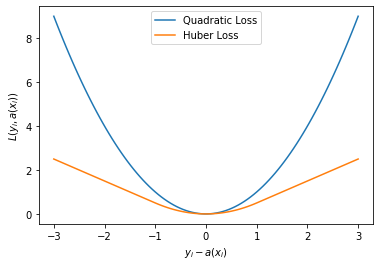

In [18]:
grid = np.linspace(-3, 3, 100)
mse_loss = grid ** 2
mae_loss = np.abs(grid)
huber_loss = 0.5 * mse_loss * (grid >= -1) * (grid <= 1) + (mae_loss - 0.5) * (grid < -1) + (mae_loss - 0.5)  * (grid > 1)
plt.plot(grid, mse_loss, label="Quadratic Loss")
plt.plot(grid, huber_loss, label="Huber Loss")
plt.xlabel("$y_i - a(x_i)$")
plt.ylabel("$L(y_i, a(x_i))$")
plt.legend()

### А теперь уже и саму линейную регрессию (4 балла)

In [19]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
      
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y):
        
        self.w = np.zeros(X.shape[1])
        self.loss_history = []
        
        loss = self.calc_loss(X, y)
        
        self.loss_history.append(loss)
        i = 1
        while  i < self.max_iter and self.loss_history[-1] >= self.tol:
            self.w = self.w - self.eta*self.calc_gradient(X, y)
            self.loss_history.append(self.calc_loss(X, y))
            i = i + 1
        return self.loss_history
    
    def huber_loss(self, x, y, w, delta):
        a = y - np.dot(w, x)

        if np.abs(a) <= delta:
            return (a**2)/2
        else:
            return delta*(np.abs(a) - delta/2)

    def huber_grad(self, x, y, w, delta):

        a = y - np.dot(w, x)
        if np.abs(a) <= delta:
            return -a*x
        else:
            return -delta*np.sign(a)*x # домножаем на знак под модулем
       
    def predict(self, X_test):
  
        y_pred = np.dot(X_test, self.w)
        return y_pred 
    
    def calc_gradient(self, X, y):
      
        grad = np.zeros_like(self.w)      
        grads = np.mean(list(map(lambda pair: huber_grad(pair[0], pair[1], self.w, self.delta), zip(X, y))), axis=0)
        assert len(grad) == len(grads)
        
        return grads 
    
    def calc_loss(self, X, y):
        
        loss = 0
        loss = np.mean(list(map(lambda pair: self.huber_loss(pair[0], pair[1], self.w, self.delta), zip(X, y))), axis=0)
        loss /= len(X)
        
        return loss

In [20]:
lr = LinearRegressionHuber()

In [21]:
loss_history = lr.fit(X_train, y_train)

Постройте график зависимости функции потерь от итерации

Text(0.5, 1.0, 'Функция потерь в зависимости от шага')

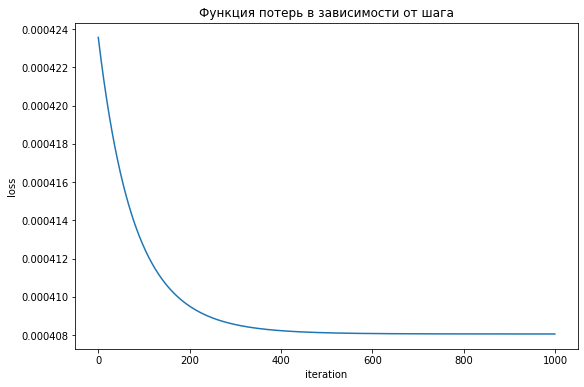

In [22]:
fig, ax = plt.subplots(figsize=(9,6))
X = np.arange(len(loss_history))
ax.plot(X, loss_history)
ax.set_xlabel("iteration")
ax.set_ylabel("loss");
ax.set_title("Функция потерь в зависимости от шага")

# Практика (7 баллов)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [24]:
data = pd.read_csv('trainn.csv', header=0)

In [25]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
data.drop('Id', axis=1, inplace=True)

## 1 (1 балл)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете? Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [28]:
data.info()
print('Из анализа данных data.info() видно, что из 80 столбцов некоторые отличаются по количеству non-null наблюдений, что говорит нам о наличии пропущенных данных. Посмотрим, в каких столбцах есть пропуски:')
null = data.columns[data.isnull().any()]
print(*null, sep = ', ')
print('Посмотрим, сколько пропусков в каждом из данных столбцов, затем посмотрим долю пропусков в каждом из них:')
data[null].isnull().sum()
print(data[null].isnull().mean())
print('Можно наблюдать практически полное отсутствие данных в столбцах Alley, PoolQC, Fence и MiscFeature. Также, нет данных по половине домов по показателю FireplaceQu и по около 1/5 домов по показателю LotFrontage. В остальном, пропуски не превышают 5-6%. Тем самым, можно сделать предварительный вывод о том, что дома с участком, на котором можно расположить басейн, и который будет огорожен забором, встречаются реже.')
print('Зполним пропуски (вещественные признаки - средним значением, категориальные признаки - пустой строкой):')

from sklearn import preprocessing

print('Те признаки, по которым практически нет данных,  очень значимо увеличивают стоимость объекта недвижимости. Поэтому дома, в которых эти параметры есть, можно считать выбросами. Поэтому оценим остальную выборку без данных признаков:')
for i in ("Alley", "PoolQC", "Fence", "MiscFeature"):
    data.drop(i, axis = 1, inplace = True) 
print('Для тех домов, где не оценено качество камина, напишем no fireplace:')
data["FireplaceQu"].fillna("fireplace not assessed", inplace = True)

print('То же самое для параметров гаража:')
for i in ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "GarageYrBlt"):
    data[i].fillna("garage not assessed", inplace = True)  

print('Таким же образом для отсутствующих признаков, измеряющих параметры и качество подвала подставим категориальное значение no basement:')
for i in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    data[i].fillna('basement not assessed', inplace = True)

print('Система электричества, скорее всего, проводится централизованно, поэтому для пропущенных значений заполним ячейки значением моды по показателю Electrical:')
data["Electrical"].fillna('SBrkr', inplace = True)

print('В данных о типе и площади мощеного покрытия дороги тоже имеются пропуски, соответственно, заполняем тип значением no masonry, а площадь покрытия обозначим равной 0:')
data["MasVnrType"].fillna("no masonry", inplace = True)
data["MasVnrArea"].fillna(0.0, inplace = True)

print('Пропущенные данные о площади уличного пространства, примыкающего к дому, можно заменить на среднее значение по показателю: 70.05')
data["LotFrontage"].fillna(70.05, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [29]:
null = data.columns[data.isnull().any()]
print(data[null].isnull().sum())
print('Мы видим пустое множество по пропущенным данным, значит, все в порядке.')

Series([], dtype: float64)
Мы видим пустое множество по пропущенным данным, значит, все в порядке.


In [30]:
data2 = data['LotFrontage']
print(data2.mean())

70.04996575342498


In [31]:
data1 = data['Electrical']
print(data1.mode)
print('Видно, что наиболее часто встречающийся тип электрической системы - SBrkr, поэтому мы используем это значение в качестве замены для пропущенных данных.')

<bound method Series.mode of 0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object>
Видно, что наиболее часто встречающийся тип электрической системы - SBrkr, поэтому мы используем это значение в качестве замены для пропущенных данных.


## 2 (0.5 балла)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование.

In [32]:
data.shape

(1460, 76)

In [33]:
# выведем все категориальные признаки в датасете
data.select_dtypes(include = 'object')
# обработаем признаки при помощи one-hot encoding

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,fireplace not assessed,Attchd,2003,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,1976,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,2001,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,2000,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Typ,TA,Attchd,1999,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Min1,TA,Attchd,1978,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Attchd,1941,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Typ,fireplace not assessed,Attchd,1950,Unf,TA,TA,Y,WD,Normal


In [34]:
data.shape
# выведем все категориальные признаки в датасете
data.select_dtypes(include = 'object')# обработаем признаки при помощи one-hot encoding
data_new = pd.get_dummies(data, drop_first=True)
# посмотрим, как изменился наш датасет
data_new.shape
data_new.select_dtypes(include = 'object')
# мы видим, что категориальных признаков не осталось в их первоначальном виде, так как теперь они хранятся в виде дамми-переменных

""
0
1
2
3
4
...
1455
1456
1457
1458


In [35]:
data_new.shape # размерность нового датасета с дамми-переменными

(1460, 344)

## 3 (0.5 балла)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

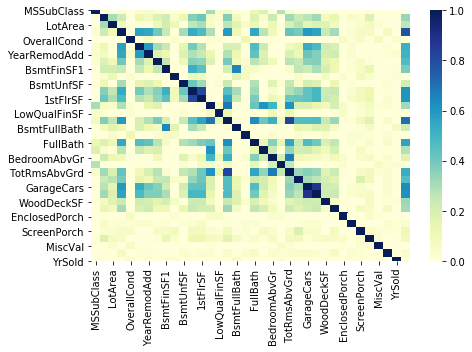

In [37]:
corr = data.corr()
np.fill_diagonal(corr.values, 1)
plt.figure(figsize=(7,5))
sns.heatmap(corr, cmap="YlGnBu", vmin=0, vmax=1)
plt.tight_layout()

Как видно из визуализации попарных корреляций, практически между всеми признаками корреляция близка к 0. При этом есть некоторые участки, в которых наблюдается сильная корреляция между признаками, но сказать что-то вразумительное по этим данным сложно.

## 5 (0.5 балла)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [38]:
datapred = np.abs(data.corr()["SalePrice"])
datapred.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

Видно, что максимальное абсолютное значение корреляции цены объекта недвижимости наблюдается с признаком OverallQual - Overall material and finish quality
(довольно логично, что общее качество дома увеличивает его стоимость): она равна 0.79. А наименьшая по модулю корреляция наблюдается с признаком BsmtFinSF2 - 
Type 2 finished square feet: 0.011378.

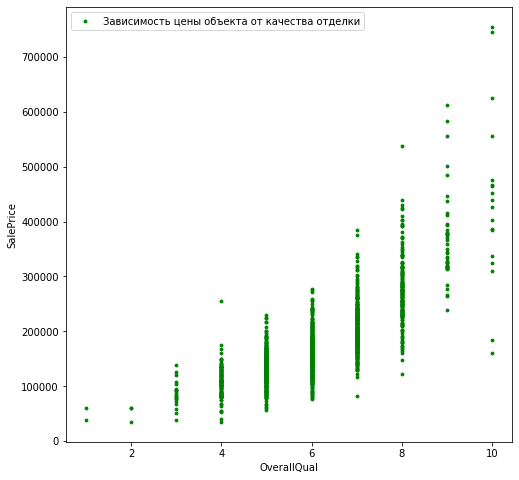

In [39]:
data.plot.scatter(x = 'OverallQual', y = 'SalePrice', s = 8, c = 'green', figsize = (8, 8), label = 'Зависимость цены объекта от качества отделки')

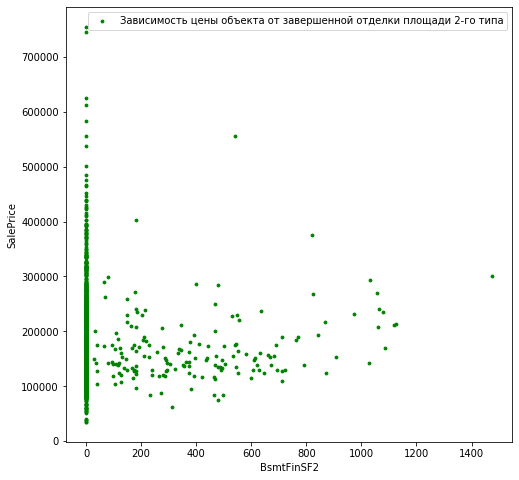

In [40]:
data.plot.scatter(x = 'BsmtFinSF2', y = 'SalePrice', s = 8, c = 'green', figsize = (8, 8), label = 'Зависимость цены объекта от завершенной отделки площади 2-го типа')

## 6 (0.5 балла)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

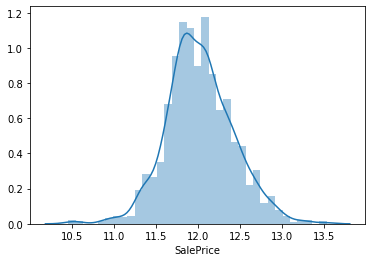

In [41]:
# логарифмируем переменную, тем самым получим более нормальное распределение
sns.distplot(np.log1p(data_new["SalePrice"]), label = 'log_SalePrice')
# по графику видно, что преобразованные наблюдения распределены нормально

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [42]:
X_train, X_val, y_train, y_val = train_test_split(data_new.drop('SalePrice', axis=1),
                                                  np.log1p(data_new['SalePrice']), random_state=17032019)

In [43]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 343), (365, 343), (1095,), (365,))

## 7 (2 балла)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

(Если вдруг забыли что такое Lasso и Ridge - https://habr.com/ru/post/328760/)

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [44]:
# попробуем KNN с произвольными параметрами
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor(n_neighbors=6, weights='uniform')
knn.fit(X_train, y_train)
predictions = knn.predict(X_val)
rmse = (mean_squared_error(y_val, predictions))**0.5
print(rmse)

0.21768114614144796


In [45]:
# запустим поиск по сетке гиперпараметров, чтобы подобрать наилучшую модель
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
# зададим параметр, который будет минимизировать ошибку (Поскольку root_mean_squared_error минимизируется в той же точке, что 
# и mean_squared_error, то просто берется MSE и параметр greater_is_better=False)
from sklearn.metrics import SCORERS
print(SCORERS.keys())

# НЕ ПОМОГЛО..

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [47]:
grid_searcher_knn = GridSearchCV(
    KNeighborsRegressor(),
         param_grid={
        'n_neighbors': range(1, 40, 2),
        'weights': ['uniform', 'distance'],
        'p': [1, 2, 3]}, scoring = 'neg_mean_squared_error',
    cv=5)

grid_searcher_knn.fit(X_train, y_train)
predictions_knn = grid_searcher_knn.predict(X_val)
rmse_knn = (mean_squared_error(y_val, predictions_knn))**0.5
print(rmse_knn)

0.19642590051465852


In [48]:
grid_searcher_lr = GridSearchCV(
    LinearRegression(),
         param_grid={
        'fit_intercept': ['True', 'False'], }, scoring = 'neg_mean_squared_error',
    cv = 4)

grid_searcher_lr.fit(X_train, y_train)
predictions_lr = grid_searcher_lr.predict(X_val)
rmse_lr = (mean_squared_error(y_val, predictions_lr))**0.5
print(rmse_lr)

0.19391376685334066


In [60]:
grid_searcher_ri = GridSearchCV(
    Ridge(),
         param_grid={
        'fit_intercept': ['True', 'False'], 
        'alpha': np.linspace(0.0001, 50, 1000)},
    cv = 8)

grid_searcher_ri.fit(X_train, y_train)
predictions_ri = grid_searcher_ri.predict(X_val)
rmse_ri = (mean_squared_error(y_val, predictions_ri))**0.5
print(rmse_ri)

0.12736543202897935


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
grid_searcher_la = GridSearchCV(
    Lasso(),
            param_grid={
            'alph a':np.linspace(0.0001, 1, 1000),
            'fit_intercept': ['True', 'False'],},
        cv=7)


grid_searcher_la.fit(X_train, y_train)
predictions_la = grid_searcher_la.predict(X_val)
rmse_la = (mean_squared_error(y_val, predictions_la))**0.5
print(rmse_la)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7497090559899879, tolerance: 0.01493795215175045
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7497090559899879, tolerance: 0.01493795215175045
  positive)


0.1299438191748579


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
print(len(grid_searcher_la.best_estimator_.coef_))

la_coef = grid_searcher_la.best_estimator_.coef_
lr_coef = grid_searcher_lr.best_estimator_.coef_
ri_coef = grid_searcher_ri.best_estimator_.coef_

343


Как видно из значений ошибок, лучше всего себя показывает метод гребневой регрессии (и Лассо чуть хуже), поскольку он выдает наименьшее значение RMSE. 

## 8 (0.5 балла)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

Text(0.5, 1.0, 'Ridge weights')

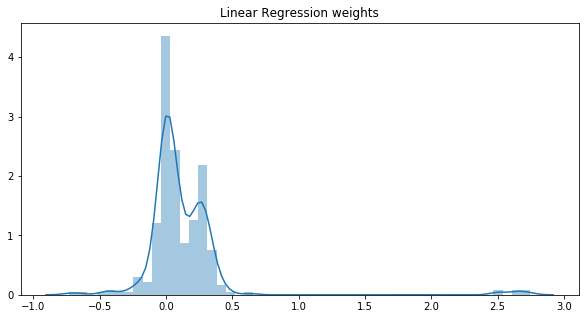

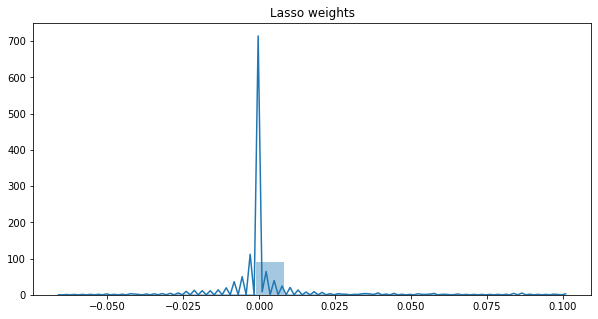

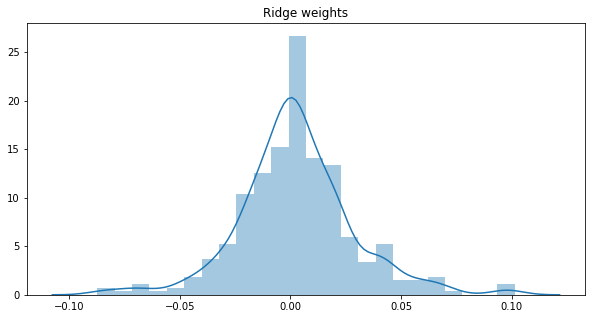

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(lr_coef, label = 'lr') 
plt.title('Linear Regression weights')

plt.figure(figsize=(10,5))
sns.distplot(la_coef, label = 'la')
plt.title('Lasso weights')

plt.figure(figsize=(10,5))
sns.distplot(ri_coef, label = 'ri')
plt.title('Ridge weights')

Мы видим, что все значения весов разбросаны около нуля, и в Лассо оценки ближе всего к нулю и встречаются с большей частотой (это проблема Лассо - некоторые веса зануляются). 

## 9 (0.5 балла)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# your code here

## 10* (1 балл)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here

# Теория (бонусная часть)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Вычислите производную сигмоидной функции

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

и выразите ее через $\sigma(x)$.

$\frac{d}{dx}(1+e^{-x})^{-1} =$ \
$-1(1+e^{-x})^{-2}(-e^{-x}) =$ 
$-1\frac{-e^{-x}}{(1+e^{-x})^2} =$ 
$\frac{e^{-x}}{(1+e^{-x})^2} =$
$\frac{{1}\cdot {e^{-x}}}{{(1+e^{-x})}\cdot{(1+e^{-x})}} =$ 
$\frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x} - 1}{1+e^{-x}} =$ 
$\frac{1}{1+e^{-x}} \cdot (\frac{1+e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}}) =$   
$\frac{1}{1+e^{-x}} \cdot (1 - \frac{1}{1+e^{-x}}) =$
(произведем обратную подстановку) 
$= \sigma(x) \cdot (1 - \sigma(x)$)

## 2* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

Вам может показаться полезной эта ссылка https://medium.com/@gennadylaptev/median-and-mae-3e85f92df2d7

*(your solution here)*